## Исследование и подготовка данных
### Приведение данных к машиночитаемому виду

In [128]:
import os, pandas, numpy
from matplotlib import pyplot
%matplotlib inline

In [129]:
train = pandas.read_csv('train.csv')


<pre>
### Определение переменных
PassengerId - не признак int категориальная
Survived - целевое значение bool категориальная
Pclass - признак int категориальная
Name - не целевое значение string категориальная 
Sex - признак bool категориальная
Age - признак int количественная
SibSp - признак int категоральная
Parch - признак int категориальная   
Ticket - не признак string
Fare - признак int количественная 
Cabin - не признак string
Embarked - не признак string

<pre>
### Пропуски в данных
Age            714 non-null float64
Cabin          204 non-null object

In [130]:
# Убираем пропуски в Age заменяя на медиану.
age_mediana = train.Age.median()
train["Age"] = train["Age"].apply(lambda a: age_mediana if numpy.isnan(a) else a)

На основе номера кабины можно классифицировать пассажиров по блокам, в которых размещались их каюты, 
так как в некоторрых блоках смертность была очень высокой, то этот параметр мог стать очень весомым при предсказании 
смерти пассажира, но так как данный показатель есть у только четверти пассажиров, то использовать его нельзя. Думаю можно вывести подобную featured на основе Pclass, Fare, Embarked и возможно Ticket. К сожалению в рамках текущего дз, не успел. 

In [131]:
#Sex это логический тип данных, для удобства и скорости дальнейших вычислений преобразуем значение в целочисленный формат.
train["Sex"] = train["Sex"].apply(lambda s: 0 if s == "male" else 1) # male -> 0, female -> 1

# Преобразуем количественную переменную Age в категориальную.
train["Age"] = train["Age"].apply(lambda a: str(int(a/10))+'0+' if not numpy.isnan(a) else None)

# Преобразуем количественную переменную Age в категориальную.
train["Fare"] = train["Fare"].apply(lambda f: str(int(f/10))+'0+' if not numpy.isnan(f) else None)

In [132]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,20+,1,0,A/5 21171,00+,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,30+,1,0,PC 17599,70+,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,20+,0,0,STON/O2. 3101282,00+,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,30+,1,0,113803,50+,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,30+,0,0,373450,00+,NaN,S


### Одномерный анализ

In [133]:
def get_surv(column):
    df=pandas.DataFrame()
    df['total']=train.groupby(column).size()
    df['survived'] = train.groupby(column).sum()['Survived']
    df['percentage'] = df['survived']/df['total']*100
    print(df)
    df['survived'].plot(kind="bar")
    df['total'].plot(kind="bar",alpha=0.2,title="Survivors per "+str(column), facecolor='g',)
    pyplot.show()

        total  survived  percentage
Pclass                             
1         216       136   62.962963
2         184        87   47.282609
3         491       119   24.236253


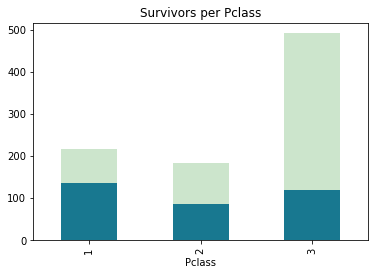

In [137]:
survival_rate('Pclass')

     total  survived  percentage
Sex                             
0      577       109   18.890815
1      314       233   74.203822


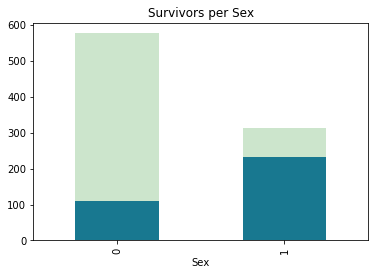

In [138]:
survival_rate('Sex')

     total  survived  percentage
Age                             
00+     62        38   61.290323
10+    102        41   40.196078
20+    397       129   32.493703
30+    167        73   43.712575
40+     89        34   38.202247
50+     48        20   41.666667
60+     19         6   31.578947
70+      6         0    0.000000
80+      1         1  100.000000


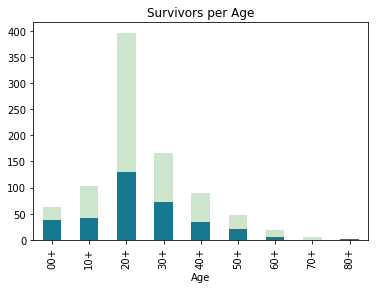

In [139]:
survival_rate('Age')

       total  survived  percentage
SibSp                             
0        608       210   34.539474
1        209       112   53.588517
2         28        13   46.428571
3         16         4   25.000000
4         18         3   16.666667
5          5         0    0.000000
8          7         0    0.000000


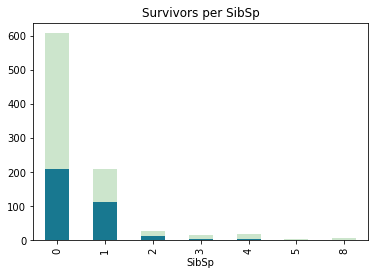

In [140]:
survival_rate('SibSp')

       total  survived  percentage
Parch                             
0        678       233   34.365782
1        118        65   55.084746
2         80        40   50.000000
3          5         3   60.000000
4          4         0    0.000000
5          5         1   20.000000
6          1         0    0.000000


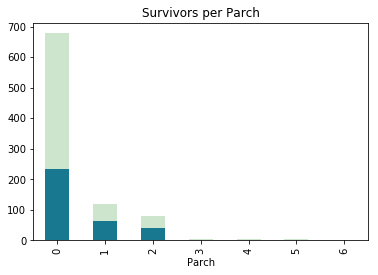

In [141]:
survival_rate('Parch')

      total  survived  percentage
Fare                             
00+     336        67   19.940476
10+     179        76   42.458101
100+      4         2   50.000000
110+      7         5   71.428571
120+      4         4  100.000000
130+      7         6   85.714286
140+      2         2  100.000000
150+      7         4   57.142857
160+      2         2  100.000000
20+     136        58   42.647059
210+      4         3   75.000000
220+      5         3   60.000000
240+      2         1   50.000000
260+      6         4   66.666667
30+      64        28   43.750000
40+      15         4   26.666667
50+      39        27   69.230769
510+      3         3  100.000000
60+      17         6   35.294118
70+      29        17   58.620690
80+      15        13   86.666667
90+       8         7   87.500000


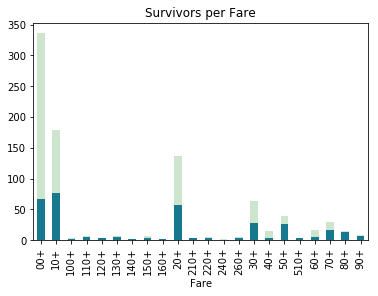

In [142]:
survival_rate('Fare')

          total  survived  percentage
Embarked                             
C           168        93   55.357143
Q            77        30   38.961039
S           644       217   33.695652


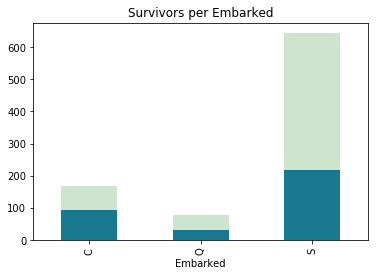

In [143]:
survival_rate('Embarked')